In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
!7z e "/kaggle/input/kkbox-music-recommendation-challenge/members.csv.7z"

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /kaggle/input/kkbox-music-recommendation-challenge                                                            1 file, 1349856 bytes (1319 KiB)

Extracting archive: /kaggle/input/kkbox-music-recommendation-challenge/members.csv.7z
--
Path = /kaggle/input/kkbox-music-recommendation-challenge/members.csv.7z
Type = 7z
Physical Size = 1349856
Headers Size = 130
Method = LZMA2:3m
Solid = -
Blocks = 1

    Everything is Ok

Size:       2503827
Compressed: 1349856


In [3]:
!7z e "/kaggle/input/kkbox-music-recommendation-challenge/songs.csv.7z"

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /kaggle/input/kkbox-music-recommendation-challenge                                                            1 file, 105809525 bytes (101 MiB)

Extracting archive: /kaggle/input/kkbox-music-recommendation-challenge/songs.csv.7z
--
Path = /kaggle/input/kkbox-music-recommendation-challenge/songs.csv.7z
Type = 7z
Physical Size = 105809525
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

          3% - songs.c                5% - songs.c                8% - songs.c               11% - songs.c               13% - songs.c               16% - songs.c               18% - songs.c               21% - songs.c               24% - songs.c               26% - 

In [4]:
!7z e "/kaggle/input/kkbox-music-recommendation-challenge/test.csv.7z"

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /kaggle/input/kkbox-music-recommendation-challenge                                                            1 file, 43925208 bytes (42 MiB)

Extracting archive: /kaggle/input/kkbox-music-recommendation-challenge/test.csv.7z
--
Path = /kaggle/input/kkbox-music-recommendation-challenge/test.csv.7z
Type = 7z
Physical Size = 43925208
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

      4% - test.cs               10% - test.cs               17% - test.cs               22% - test.cs               28% - test.cs               33% - test.cs               39% - test.cs               45% - test.cs               53% - test.cs               59% - test.cs  

In [5]:
!7z e "/kaggle/input/kkbox-music-recommendation-challenge/train.csv.7z"

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /kaggle/input/kkbox-music-recommendation-challenge                                                            1 file, 106420688 bytes (102 MiB)

Extracting archive: /kaggle/input/kkbox-music-recommendation-challenge/train.csv.7z
--
Path = /kaggle/input/kkbox-music-recommendation-challenge/train.csv.7z
Type = 7z
Physical Size = 106420688
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

      2% - train.c                5% - train.c                7% - train.c               10% - train.c               13% - train.c               15% - train.c               18% - train.c               20% - train.c               22% - train.c               25% - trai

In [6]:
!7z e "/kaggle/input/kkbox-music-recommendation-challenge/song_extra_info.csv.7z"

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /kaggle/input/kkbox-music-recommendation-challenge                                                            1 file, 103608205 bytes (99 MiB)

Extracting archive: /kaggle/input/kkbox-music-recommendation-challenge/song_extra_info.csv.7z
--
Path = /kaggle/input/kkbox-music-recommendation-challenge/song_extra_info.csv.7z
Type = 7z
Physical Size = 103608205
Headers Size = 140
Method = LZMA:25
Solid = -
Blocks = 1

      1% - song_extra_info.c                          4% - song_extra_info.c                          6% - song_extra_info.c                          8% - song_extra_info.c                         10% - song_extra_info.c                         12% 

In [7]:
df = pd.read_csv("/kaggle/working/train.csv")
df

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1


In [8]:
songs = pd.read_csv('/kaggle/working/songs.csv')
df = pd.merge(df, songs, on='song_id', how='left')
del songs

# Load and join members data
members = pd.read_csv('/kaggle/working/members.csv')
df = pd.merge(df, members, on='msno', how='left')
del members

In [9]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(value = "unknown")
# Numerics with mean    
for col in df.select_dtypes(exclude=['object']).columns:
    df[col] = df[col].fillna(value = df[col].mean())

In [10]:
dtypes = pd.DataFrame(df.dtypes,columns=["Data Type"])

dtypes["Unique Values"]=df.nunique().sort_values(ascending=True)

dtypes["Null Values"]=df.isnull().sum()

dtypes["% null Values"]=df.isnull().sum()/len(df)

dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

,Data Type,Unique Values,Null Values,% null Values
msno,object,30755,0,0.000000
song_id,object,359966,0,0.000000
registration_init_time,int64,3811,0,0.000000
registered_via,int64,5,0,0.000000
gender,object,3,0,0.000000
bd,int64,92,0,0.000000
city,int64,21,0,0.000000
language,float64,11,0,0.000000
lyricist,object,33888,0,0.000000
composer,object,76064,0,0.000000


In [11]:
df['registration_init_time'] = pd.to_datetime(df['registration_init_time'], format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day


df['expiration_date'] = pd.to_datetime(df['expiration_date'],  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day
# Dates to categoty
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category') 
df

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,...,unknown,7,2012-01-02,2017-10-05,2012,1,2,2017,10,5
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,unknown,...,female,9,2011-05-25,2017-09-11,2011,5,25,2017,9,11
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,...,female,9,2011-05-25,2017-09-11,2011,5,25,2017,9,11
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,...,female,9,2011-05-25,2017-09-11,2011,5,25,2017,9,11
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,...,unknown,7,2012-01-02,2017-10-05,2012,1,2,2017,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1,267958.0,1259,Dr. Dre,Andre R. Young| Melvin Charles Bradford| Shawn...,...,female,9,2004-12-18,2017-09-30,2004,12,18,2017,9,30
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0,227404.0,465,R. City feat. Adam Levine,Theron Thomas| Timothy Thomas| Lukasz Gottwald...,...,unknown,7,2013-06-27,2017-10-06,2013,6,27,2017,10,6
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1,258298.0,465,兄弟本色G.U.T.S. (姚中仁、張震嶽、頑童MJ116),姚中仁 MC HotDog 陳昱榕 Ｅ-SO 周文傑 KENZY 林睦淵,...,unknown,7,2013-06-27,2017-10-06,2013,6,27,2017,10,6
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1,524146.0,2122,Brad Mehldau Trio,unknown,...,unknown,9,2015-02-13,2017-09-18,2015,2,13,2017,9,18


In [12]:
# Object data to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

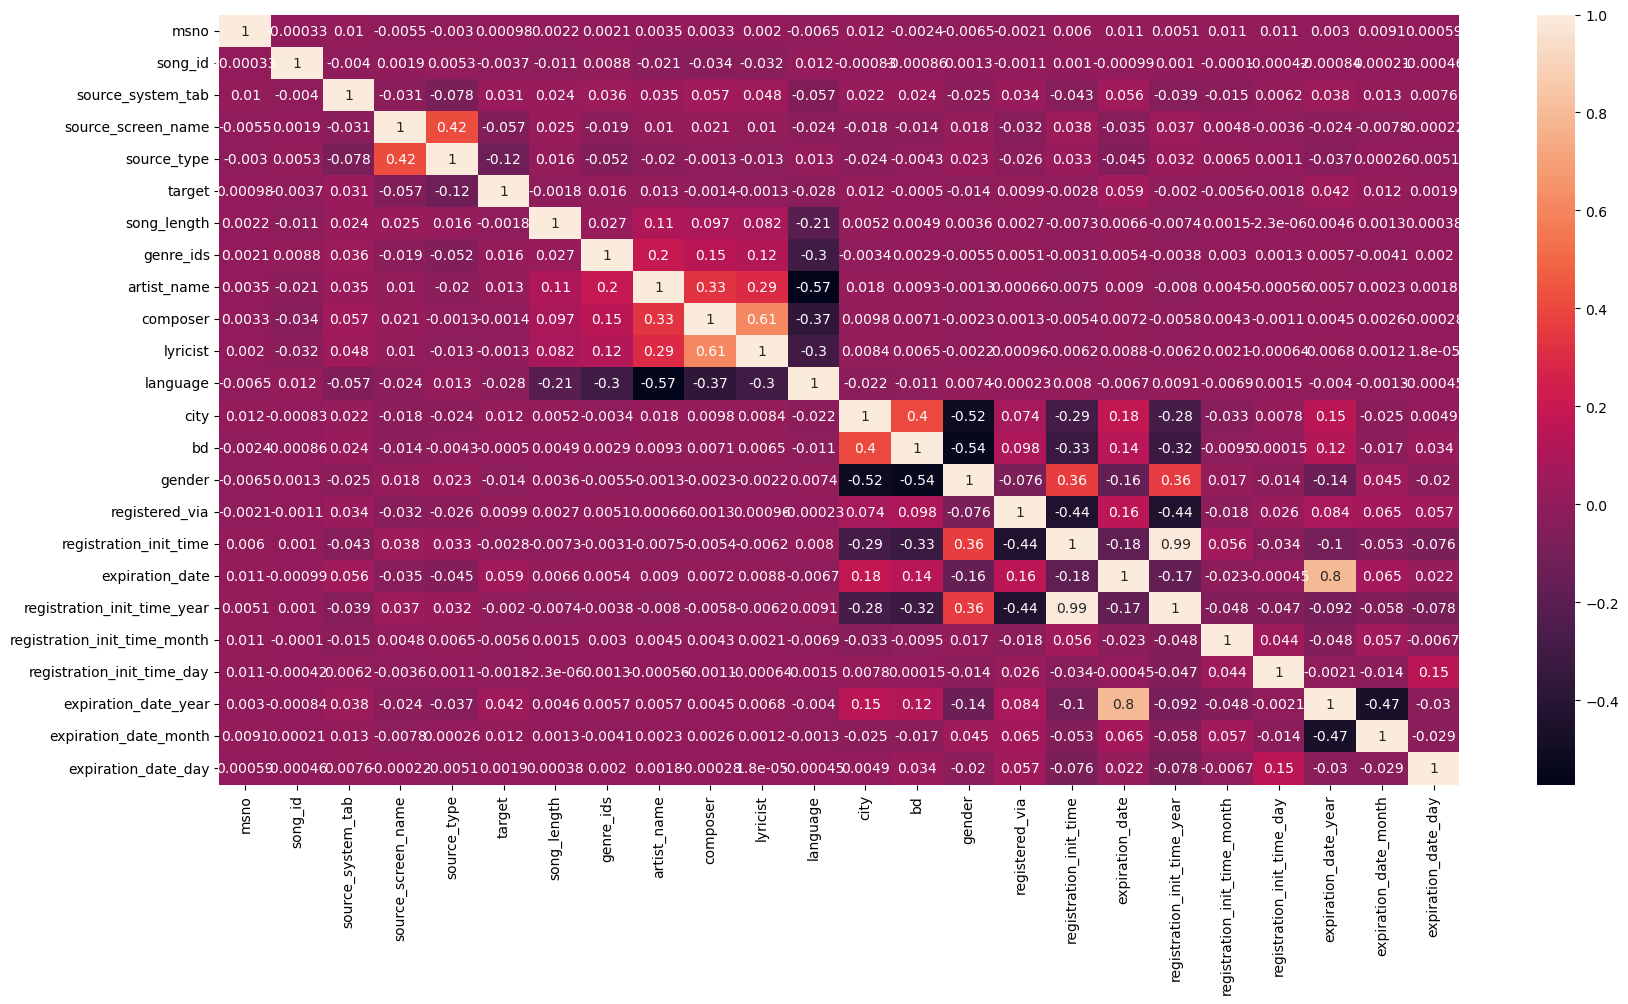

In [13]:
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(), annot=True)
plt.show()

In [14]:
target = df.pop('target')
train_data, test_data, train_labels, test_labels = train_test_split( df , target, test_size = 0.2)

In [15]:
import xgboost as xgb

In [ ]:
XGB = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5)
XGB.fit(train_data, train_labels)

In [ ]:
XGB_TrainScore = XGB.score(train_data, train_labels)
XGB_TrainScore

In [ ]:
XGB_TestScore = XGB.score(test_data, test_labels)
XGB_TestScore

In [ ]:
y_pred_xgb =XGB.predict(test_data)
y_pred_xgb

In [ ]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
cm_lgbm = confusion_matrix(test_labels, y_pred_xgb)
sns.heatmap(cm_lgbm, annot=True, fmt='g')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, y_pred_xgb))